In [1]:
import os
import pandas as pd

import std_eda
import pylint_model

In [2]:
CSV_PATH = os.getcwd()
CSV_NAME = r'\pylint.csv'

In [3]:
pd.set_option('display.max_columns', 100,
              'display.max_colwidth', 1000,
              'display.max_rows',100)

# I. Preparation

In [4]:
df = pd.read_csv(CSV_PATH + CSV_NAME, sep=';')
df = pylint_model.clean_df(df)
df = pylint_model.get_message_level(df)
df = pylint_model.get_clean_messages(df)
df = pylint_model.get_category(df)
df = pylint_model.get_clean_message(df)

# II. Visualisation

In [5]:
Explorator = std_eda.EdaExplorator(df)
Displayer = Explorator.displayer

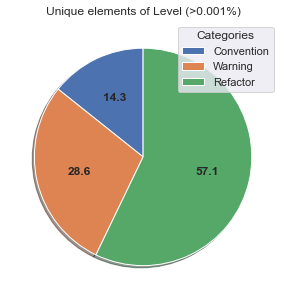

In [6]:
Displayer.plot_feature('Level')

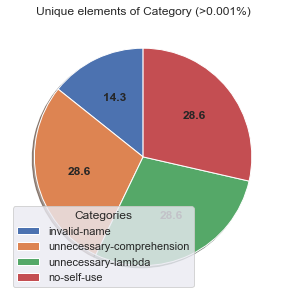

In [7]:
Displayer.plot_feature('Category')

# III. Cleaning

## A. Errors

In [8]:
df[df['Level']=='Error'].sort_values('Line', ascending=True)

,Line,Message,Level,Category


## B. Warnings

In [9]:
df[df['Level']=='Warning'].sort_values('Line', ascending=True)

,Line,Message,Level,Category
3,628,Lambda may not be necessary,Warning,unnecessary-lambda
4,662,Lambda may not be necessary,Warning,unnecessary-lambda


## C. Refactor

In [10]:
df[df['Level']=='Refactor'].sort_values('Line', ascending=True)

,Line,Message,Level,Category
1,364,Unnecessary use of a comprehension,Refactor,unnecessary-comprehension
2,391,Unnecessary use of a comprehension,Refactor,unnecessary-comprehension
5,891,Method could be a function,Refactor,no-self-use
6,966,Method could be a function,Refactor,no-self-use


## D. Convention

In [11]:
categories = df[df['Level']=='Convention']['Category']
main_category = list(dict(categories.value_counts()).items())[0][0]
df[df['Category']==main_category].sort_values(by='Line')

,Line,Message,Level,Category
0,87,"Attribute name ""df"" doesnt conform to snake_case naming style",Convention,invalid-name


# III. Demande Guillaume

**Nombre de lignes**

In [13]:
with open(r"pylint_model.py", 'r') as fp:
    lines = len(fp.readlines())
    print('Total number of lines:', lines)

Total number of lines: 80
